## Comunicación con un LLM mediante una API usando Groq


### Importar librerías y API KEY


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from groq import Groq
import time
from collections import Counter
import seaborn as sns

# Configurar la API key de Groq
os.environ["GROQ_API_KEY"] = "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"

# Inicializar el cliente de Groq
client = Groq()

### Petición POST al LLM con el formato requerido

In [2]:
# Diccionario para almacenar las respuestas
data = {"Response": []}

# Único prompt
prompt = "What is a dog?"
#Definir el LLM a utilizar
modelo = "llama3-groq-8b-8192-tool-use-preview"

# Función para obtener respuesta del LLM
def obtener_respuesta(prompt):
    try:
        chat_completion = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model=modelo,
            max_tokens=50,  # Respuestas cortas
            stream=False,
            timeout=5
        )
        return chat_completion.choices[0].message.content
    except Exception as e:
        print(f"Error al obtener respuesta: {e}")
        return "Error"

### Obtener respuesta (puede tardar varios minutos)

In [3]:
# Obtener 100 respuestas
for i in range(100):
    response = obtener_respuesta(prompt)
    
    # Guardar la respuesta en el diccionario
    data["Response"].append(response)
    
    # Mostrar progreso cada 10 respuestas
    if (i + 1) % 10 == 0:
        print(f"Progreso: {i + 1}/100 respuestas obtenidas.")
    
    # Espera mínima para evitar saturar la API
    time.sleep(0.1)

Progreso: 10/100 respuestas obtenidas.
Progreso: 20/100 respuestas obtenidas.
Progreso: 30/100 respuestas obtenidas.
Progreso: 40/100 respuestas obtenidas.
Progreso: 50/100 respuestas obtenidas.
Progreso: 60/100 respuestas obtenidas.
Progreso: 70/100 respuestas obtenidas.
Progreso: 80/100 respuestas obtenidas.
Progreso: 90/100 respuestas obtenidas.
Progreso: 100/100 respuestas obtenidas.


### Almacenar las respuestas en dataframe y guardar en un fichero csv

In [ ]:
# Crear un DataFrame con las respuestas y guardar en CSV
df = pd.DataFrame(data)
output_file = "basic_responses.csv"
df.to_csv(output_file, index=False)
print(f"Respuestas guardadas en el archivo {output_file}")
# Leer el CSV y mostrar las primeras 5 filas
df = pd.read_csv("basic_responses.csv")
print(df.head())

Respuestas guardadas en el archivo basic_responses.csv


### Sacar estadísticas

In [ ]:
# Paso 2: Procesamiento de texto
df['Response'] = df['Response'].str.lower() # Convertir a minúsculas

# Contar la longitud de cada respuesta
df['Length'] = df['Response'].str.len() # Longitud de la respuesta

# Contar la cantidad de palabras de cada respuesta
df['Word Count'] = df['Response'].str.split().apply(len) # Cantidad de palabras

### Generar estadísticas básicas

In [7]:
# Paso 3: Generar estadísticas simples
print("\nEstadísticas descriptivas:")
print(df[['Length', 'Word Count']].describe())


Estadísticas descriptivas:
           Length  Word Count
count  100.000000  100.000000
mean   227.900000   39.700000
std     11.301649    0.541229
min    215.000000   38.000000
25%    220.000000   39.000000
50%    221.000000   40.000000
75%    239.000000   40.000000
max    250.000000   40.000000


#### Generar estadísticas específicas

In [8]:
# Análisis de las palabras más comunes en las respuestas
all_words = ' '.join(df['Response']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)

print("\nPalabras más comunes:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Palabras más comunes:
to: 226
a: 205
are: 189
known: 174
as: 158
and: 152
dog,: 100
also: 100
canis: 100
lupus: 100


### Gráfico de longitudes

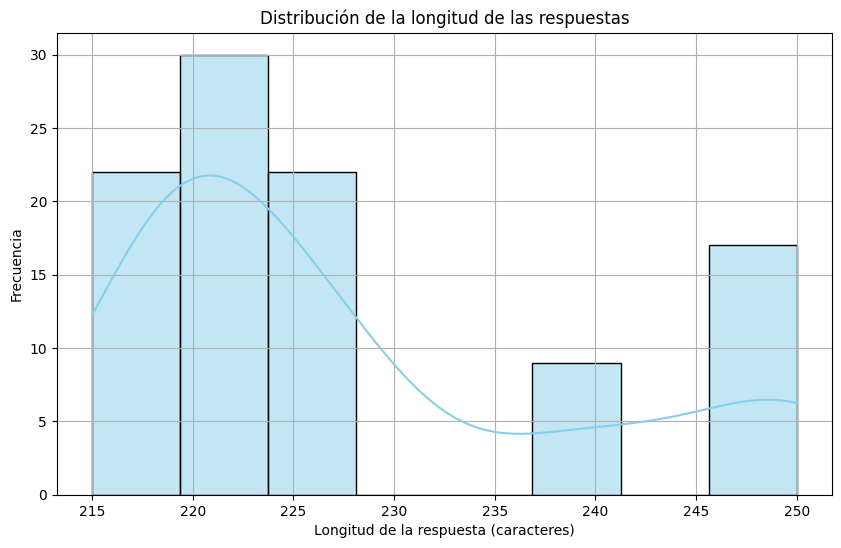

In [9]:
# Paso 4: Crear gráficos
# Gráfico de distribución de la longitud de las respuestas
plt.figure(figsize=(10, 6))
sns.histplot(df['Length'], kde=True, color='skyblue')
plt.title('Distribución de la longitud de las respuestas')
plt.xlabel('Longitud de la respuesta (caracteres)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

### Gráfico de palabras más comunes

C:\Users\javie\AppData\Local\Temp\ipykernel_8956\1128859662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(frequencies), palette="viridis")


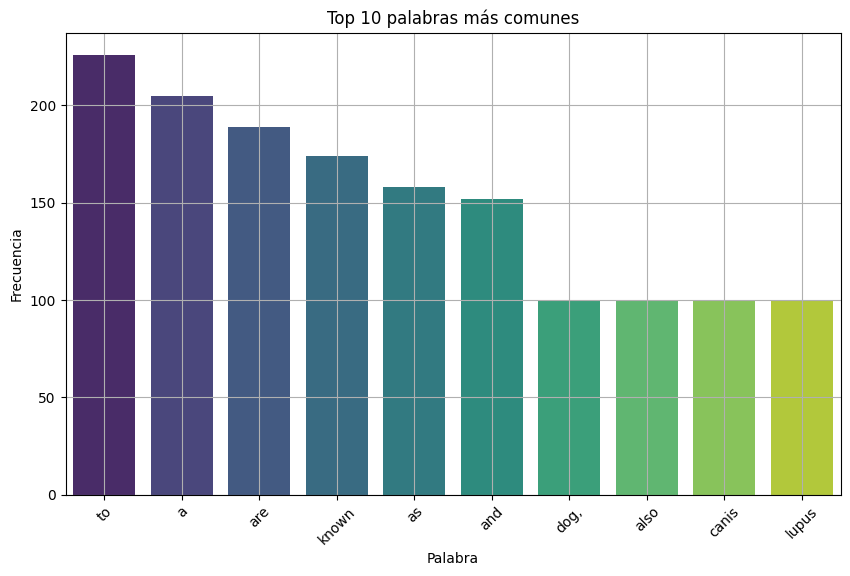

In [10]:
# Gráfico de palabras más comunes
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(frequencies), palette="viridis")
plt.title('Top 10 palabras más comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid()
plt.show()